# 4.2 - Más modelos USL

In [1]:
import pylab as plt
%matplotlib inline

from sklearn.datasets import make_moons

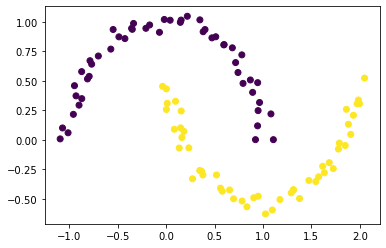

In [2]:
moons=make_moons(n_samples=100, shuffle=True, noise=0.05)
plt.scatter(moons[0][:,0], moons[0][:,1], c=moons[1]);

# DBSCAN 

**Density Based Spatial Clustering of Applications with Noise**

![dbscan](images/dbscan.png)


DBSCAN requiere de dos parámetros:

+ $\epsilon$ : distancia de la vecindad
+ Número mínimo de puntos para considerarla vecindad

Se comienza con un punto arbitrario que no haya sido visitado. La $\epsilon$-vecindad de éste punto se evalúa, para determinar su densidad y si tiene suficientes puntos se clusteriza, si no, se considera que el punto es ruido.


**Ventajas**
+ No necesita saber el nº de clusters
+ Se reduce el single-link (un cluster dentro de otro)
+ Tiene noción del ruido (detecta muy bien outliers)
+ Solo dos parámetros


**Desventajas**
+ No es determinista en los límites del cluster
+ Depende de la distancia
+ No puede manejar grandes diferencias de densidad


https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

In [3]:
from sklearn.cluster import DBSCAN

In [7]:
dbscan=DBSCAN()

dbscan.fit(moons[0])

#help(dbscan)

DBSCAN()

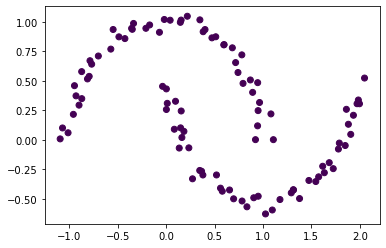

In [8]:
plt.scatter(moons[0][:,0], 
            moons[0][:,1], 
            c=dbscan.labels_);

In [9]:
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [18]:
dbscan=DBSCAN(eps=0.1, min_samples=3)

dbscan.fit(moons[0])

DBSCAN(eps=0.1, min_samples=3)

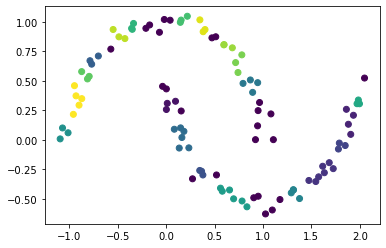

In [19]:
plt.scatter(moons[0][:,0], 
            moons[0][:,1], 
            c=dbscan.labels_);

In [20]:
dbscan.labels_

array([15,  0,  1, -1,  2, -1, -1, 17, -1,  3, -1,  4,  5,  7,  6,  3, -1,
        7, -1,  8,  9,  1, 10,  5, 11, -1, -1,  6,  1, 12, 13, 18,  2,  6,
        8, -1,  6, 14,  2, -1,  6,  8, 10,  8,  2, 15, -1, -1, 12, -1, 16,
       10, 19, 12, 10, 16, 15,  7, -1, 16, 14, -1,  3, -1,  4, 19, 13, -1,
        7,  0, 17,  2,  2,  0, 11, 18, -1,  1, -1, -1, 10, -1,  5, -1, 17,
       14, 19, 19,  9, 13, 19, -1, -1,  2, 10, 18, 11,  9,  6,  4])

# HDBSCAN

**Hierarchical DBSCAN**

https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html

Extiende DBSCAN haciéndolo jerárquico. El algoritmo se basa en:

1) Transformar el espacio según densidad

2) Grafo de árboles de distancias

3) Cluster jerárquicos

4) Condensar los clusters basándose en el tamaño

5) Extraer clusters estables desde el árbol

In [ ]:
#!pip install hdbscan

In [21]:
from hdbscan import HDBSCAN

In [24]:
hdbscan=HDBSCAN(gen_min_span_tree=True)

#help(hdbscan)

In [25]:
hdbscan.fit(moons[0])

HDBSCAN(gen_min_span_tree=True)

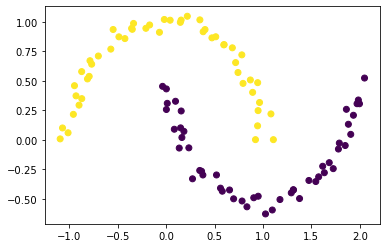

In [26]:
plt.scatter(moons[0][:,0], 
            moons[0][:,1], 
            c=hdbscan.labels_);

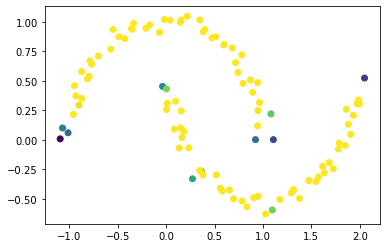

In [29]:
plt.scatter(moons[0][:,0], 
            moons[0][:,1], 
            c=hdbscan.probabilities_);

In [32]:
hdbscan.probabilities_.min()

0.5888234119491117

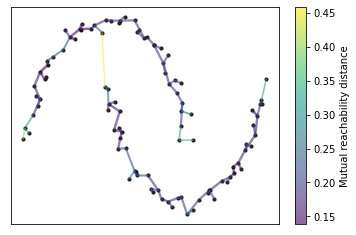

In [33]:
hdbscan.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                    edge_alpha=0.6,
                                    node_size=10,
                                    edge_linewidth=1.2);

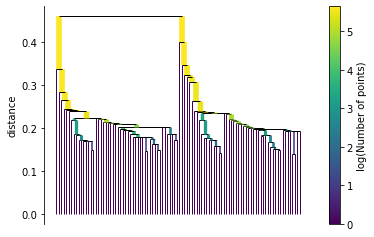

In [34]:
hdbscan.single_linkage_tree_.plot(cmap='viridis',
                                  colorbar=True);

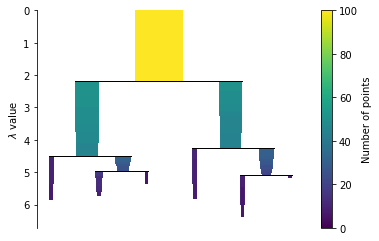

In [35]:
hdbscan.condensed_tree_.plot();

In [36]:
import seaborn as sns

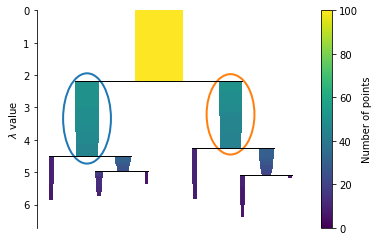

In [37]:
hdbscan.condensed_tree_.plot(select_clusters=True,
                             selection_palette=sns.color_palette());

# OPTICS

**Ordering Points To Identify the Clustering Structure**

Generalización del DBSCAN, busca el núcleo de la muestra con la más alta densidad y expande los clusteres desde ahí.

![optics](images/optics.png)

In [38]:
from sklearn.cluster import OPTICS

In [41]:
opt=OPTICS(max_eps=1, eps=0.5, min_samples=5)

opt.fit(moons[0])
#help(opt)

OPTICS(eps=0.5, max_eps=1)

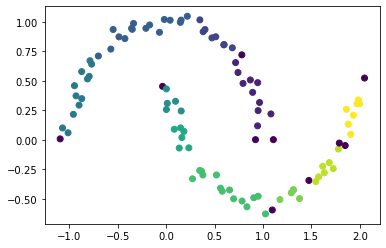

In [42]:
plt.scatter(moons[0][:,0], moons[0][:,1], c=opt.labels_);

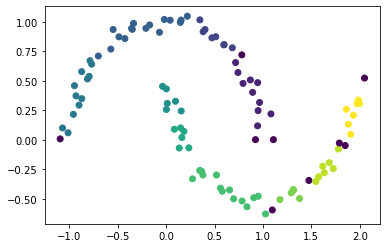

In [45]:
opt=OPTICS(eps=0.2, max_eps=0.4)
opt.fit(moons[0])

plt.scatter(moons[0][:,0], moons[0][:,1], c=opt.labels_);

# GMM

**Gaussian Mixture Models**

Se asume que los datos son mezclas de un nº finito de distribuciones gaussianas de parámetros desconocidos (N($\mu$,$\sigma$))


![gmm](images/gmm.png)


![gmm2](images/gmm2.png)

In [46]:
from sklearn.mixture import GaussianMixture as GM

In [48]:
gm=GM(n_components=2, covariance_type='full')

#help(gm)

In [49]:
gm.fit(moons[0])

gm.means_

array([[ 1.13707128, -0.1354404 ],
       [-0.1372593 ,  0.63302924]])

In [50]:
gm.covariances_

array([[[0.34024283, 0.04998631],
        [0.04998631, 0.10437282]],

       [[0.35178762, 0.05794389],
        [0.05794389, 0.09918012]]])

In [52]:
gm.predict_proba(moons[0])[:5]

array([[3.83771612e-02, 9.61622839e-01],
       [4.38272431e-02, 9.56172757e-01],
       [9.99836254e-01, 1.63745980e-04],
       [5.07348639e-05, 9.99949265e-01],
       [9.99993373e-01, 6.62664923e-06]])

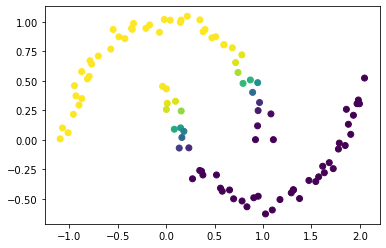

In [53]:
plt.scatter(moons[0][:,0], 
            moons[0][:,1], 
            c=gm.predict_proba(moons[0])[:,1]);

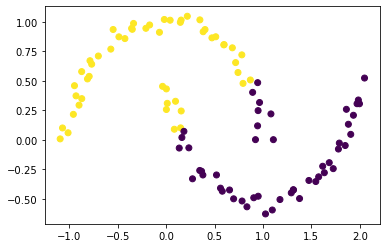

In [54]:
plt.scatter(moons[0][:,0], 
            moons[0][:,1], 
            c=gm.predict(moons[0]));

In [55]:
from sklearn.datasets import make_classification as mc

In [56]:
X=mc(n_features=2, 
     n_redundant=0, 
     n_informative=2, 
     n_clusters_per_class=1)

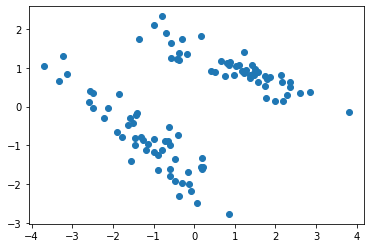

In [57]:
plt.scatter(X[0][:,0], X[0][:,1]);

In [58]:
gm=GM(n_components=2, covariance_type='full')

gm.fit(X[0]);

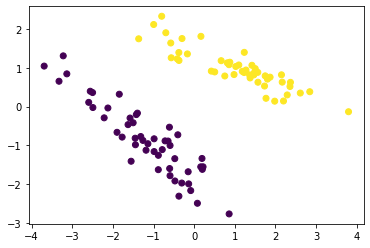

In [59]:
plt.scatter(X[0][:,0], X[0][:,1], c=gm.predict(X[0]));

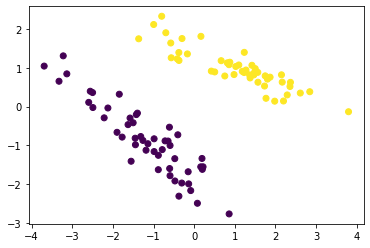

In [60]:
plt.scatter(X[0][:,0], X[0][:,1], c=gm.predict_proba(X[0])[:,1]);

![](data/usl_models.png)

![usl_models](images/usl_models.png)